**Name:** Muhammad Umer

**Email** umerhayat282@gmail.com

**Date** November 19, 2025

____

## About This Notebook

This notebook demonstrates the process of building and training a basic Artificial Neural Network (ANN) using TensorFlow Keras. The task involves image classification on the Fashion MNIST dataset, a collection of grayscale images of various clothing items.

Here's a breakdown of the steps:

*   **Data Import**: The Fashion MNIST dataset is loaded directly from Keras, providing both training and testing image sets along with their respective labels.
*   **Data Preprocessing**: Images are scaled from their original 0-255 pixel range to 0-1 and flattened from a 2D (28x28) format into 1D vectors suitable for the ANN.
*   **Model Architecture**: A sequential Keras model is constructed with three `Dense` layers, incorporating ReLU activation for hidden layers and Softmax activation for the output layer to handle multi-class classification.
*   **Model Compilation**: The model is configured with the Adam optimizer, `sparse_categorical_crossentropy` loss function, and `accuracy` as the evaluation metric.
*   **Model Training**: The model is trained over 10 epochs, monitoring both training and validation performance.
*   **Model Evaluation**: The trained model's performance is assessed on an unseen test dataset.
*   **Training Visualization**: Graphs illustrating the training and validation accuracy and loss over epochs are generated to provide insights into the model's learning process.

___

# Table of Contents

Click any link to jump to that section:

1. [Import Libraries](#import-libraries)
2. [Load the Dataset](#load-dataset)
3. [Preprocess the Data](#preprocess-data)
4. [Build the ANN Model](#build-ann-model)
5. [Compile the Model](#compile-model)
6. [Train the Model](#train-model)
7. [Evaluate the Model](#evaluate-model)
8. [Visualize Training History](#visualize-training-history)

___

<a id="import-libraries"></a>
### 1. Import Libraries
Import TensorFlow, Keras and supporting libraries (numpy, matplotlib).

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


<a id="load-dataset"></a>
### 2. Load the Dataset
Load the Fashion MNIST dataset from Keras (train and test splits).

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for better readability
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the shape of the dataset
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


<a id="preprocess-data"></a>
### 3. Preprocess the Data
Scale pixel values to [0,1] and flatten images for ANN input.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape/Flatten the images for the ANN
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

print(f"Flattened training images shape: {train_images_flat.shape}")
print(f"Flattened test images shape: {test_images_flat.shape}")

Flattened training images shape: (60000, 784)
Flattened test images shape: (10000, 784)


<a id="build-ann-model"></a>
### 4. Build the ANN Model
Define a Sequential neural network with Dense hidden layers and a softmax output.

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Input layer, flattens 28x28 images to 784 pixels
    keras.layers.Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(64, activation='relu'),  # Another hidden layer
    keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 classes) and Softmax activation
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<a id="compile-model"></a>
### 5. Compile the Model
Configure optimizer, loss function and evaluation metrics for training.

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

<a id="train-model"></a>
### 6. Train the Model
Train the model with fit(), using validation split to monitor performance.

In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7709 - loss: 0.6633 - val_accuracy: 0.8505 - val_loss: 0.4158
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8606 - loss: 0.3873 - val_accuracy: 0.8551 - val_loss: 0.3876
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8756 - loss: 0.3444 - val_accuracy: 0.8709 - val_loss: 0.3557
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8818 - loss: 0.3174 - val_accuracy: 0.8842 - val_loss: 0.3291
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8921 - loss: 0.2905 - val_accuracy: 0.8798 - val_loss: 0.3437
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8926 - loss: 0.2859 - val_accuracy: 0.8818 - val_loss: 0.3355
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9002 - loss: 0.2708 - val_accuracy: 0.8823 - val_loss: 0.3355
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9029 - loss: 0.2579 - 

<a id="evaluate-model"></a>
### 7. Evaluate the Model
Evaluate the trained model on the held-out test set and report metrics.

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.8760 - loss: 0.3680

Test accuracy: 0.8759999871253967


<a id="visualize-training-history"></a>
### 8. Visualize Training History
Plot training and validation accuracy and loss over epochs.

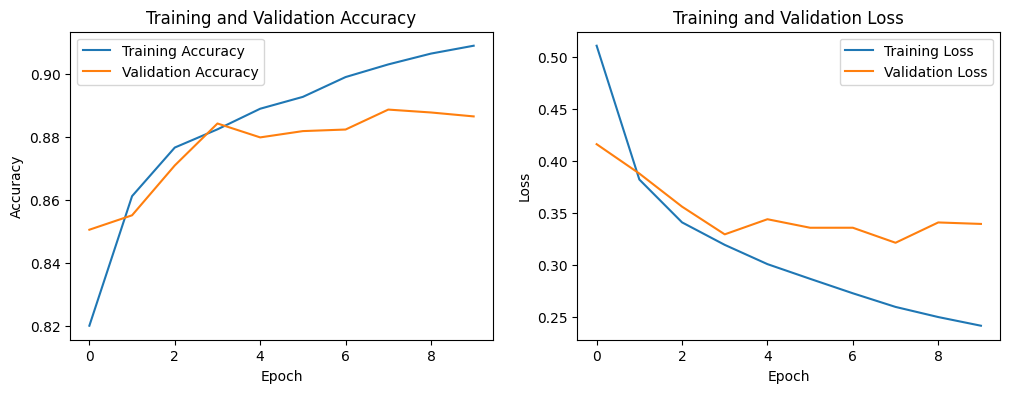

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

___